# Implementing Regression task and Classification task through Neural Networks using fake custom created dataset in Pytorch

# 1. Regression task

In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [2]:
torch.manual_seed(1)
# ensures that random number generated by Pytorch random module,
# will be same every time code runs!

# Creating fake data

In [3]:
# x data (tensor)
# dim=1 adds dimension at end, dim=0 adds dimension at beginning
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1).requires_grad_(True) # shape=(100, 1)

# y data (tensor)
y = x.pow(2) + 0.2*torch.rand(x.size()) # noisy y data (tensor), shape=(100, 1)

# Visualize our fake data

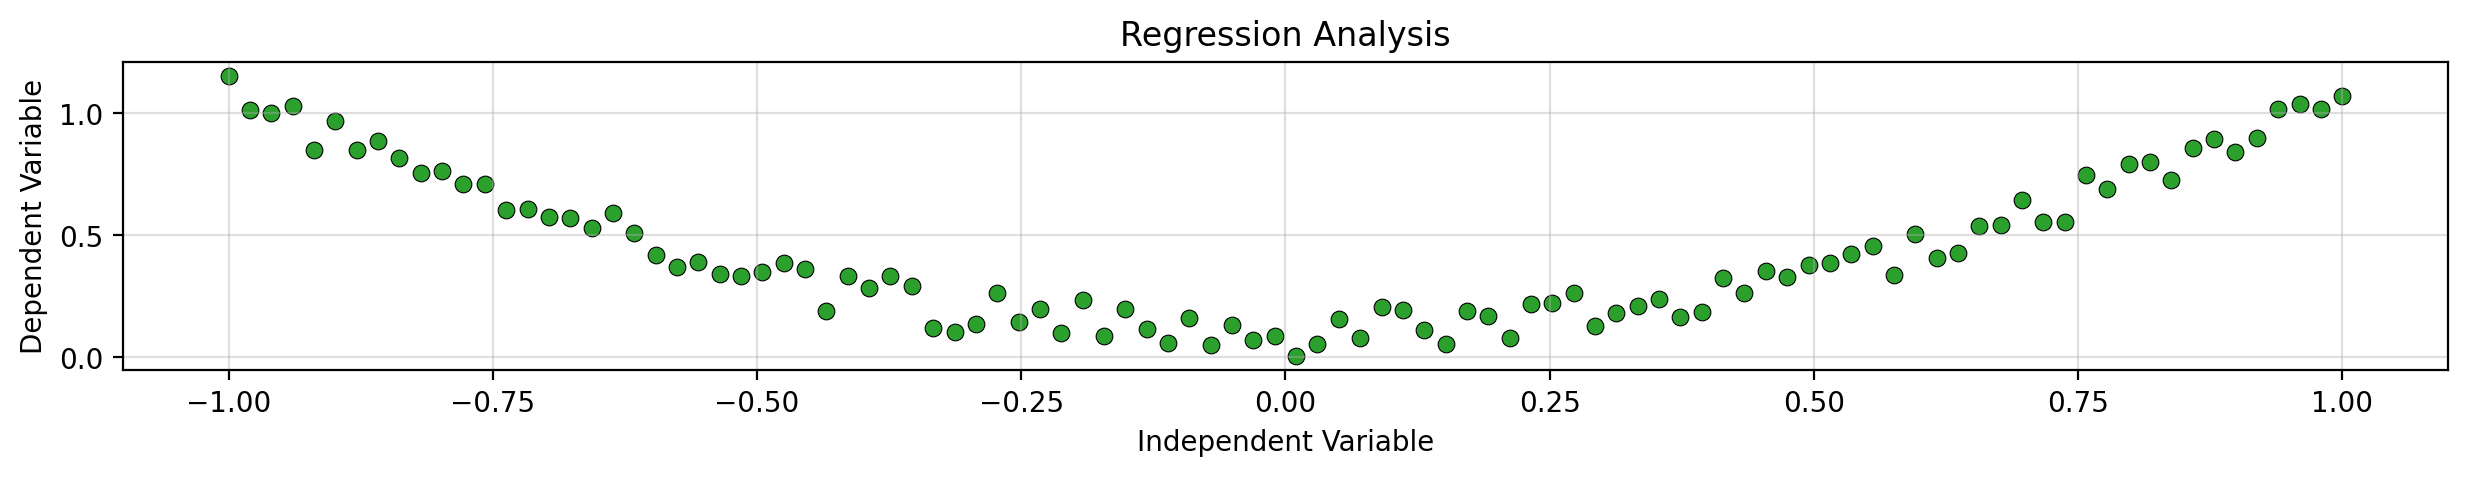

In [4]:
plt.figure(figsize=(15,2), dpi=200)
plt.scatter(x.data.numpy(), y.data.numpy(),
           color='#2ca02c',
           marker='o',
           linewidth=0.4,
           edgecolor='black')
plt.title('Regression Analysis')
plt.xlabel('Independent Variable')
plt.ylabel('Dependent Variable')
plt.grid(alpha=0.4)
plt.show();

# Model Fitting

In [5]:
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)
        self.predict = torch.nn.Linear(n_hidden, n_output)

    def forward(self, x):
        x = F.relu(self.hidden(x)) # activation function for hidden layer
        x = self.predict(x)        # linear output
        return x

In [6]:
net = Net(n_feature=1, n_hidden=10, n_output=1)
print(net)

Net(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=1, bias=True)
)


# Defining optimizer and loss function

In [7]:
optimizer = torch.optim.SGD(net.parameters(), lr=0.2)
loss_function = torch.nn.MSELoss() # this is for regression mean_squred loss

# Now let's predict, perform back-propagation, and optimize and visualize

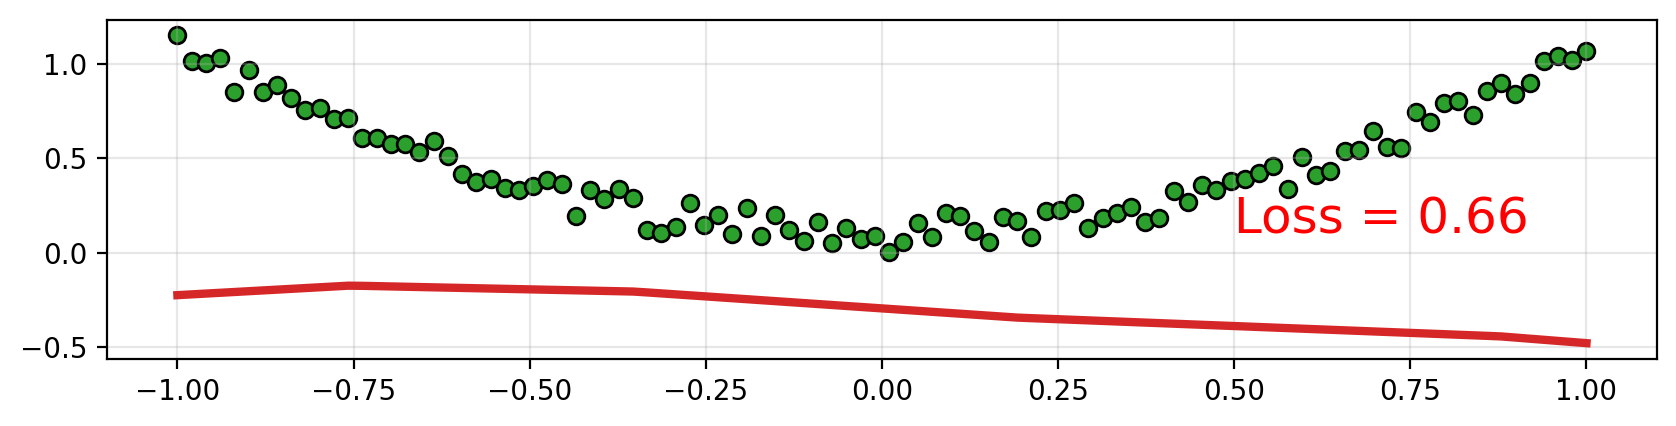

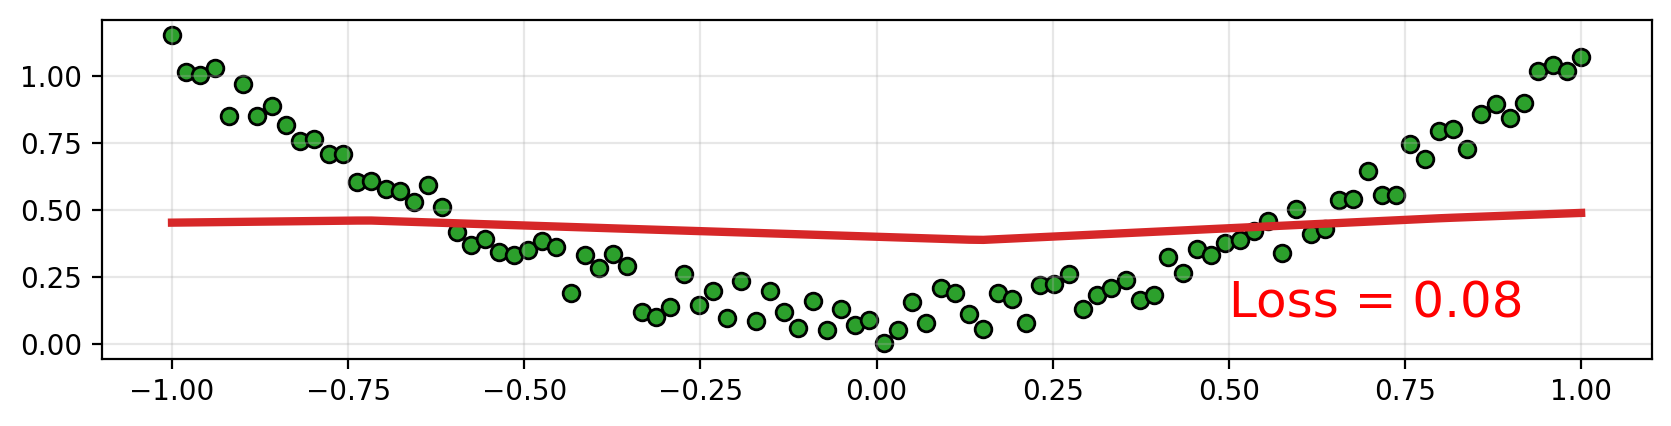

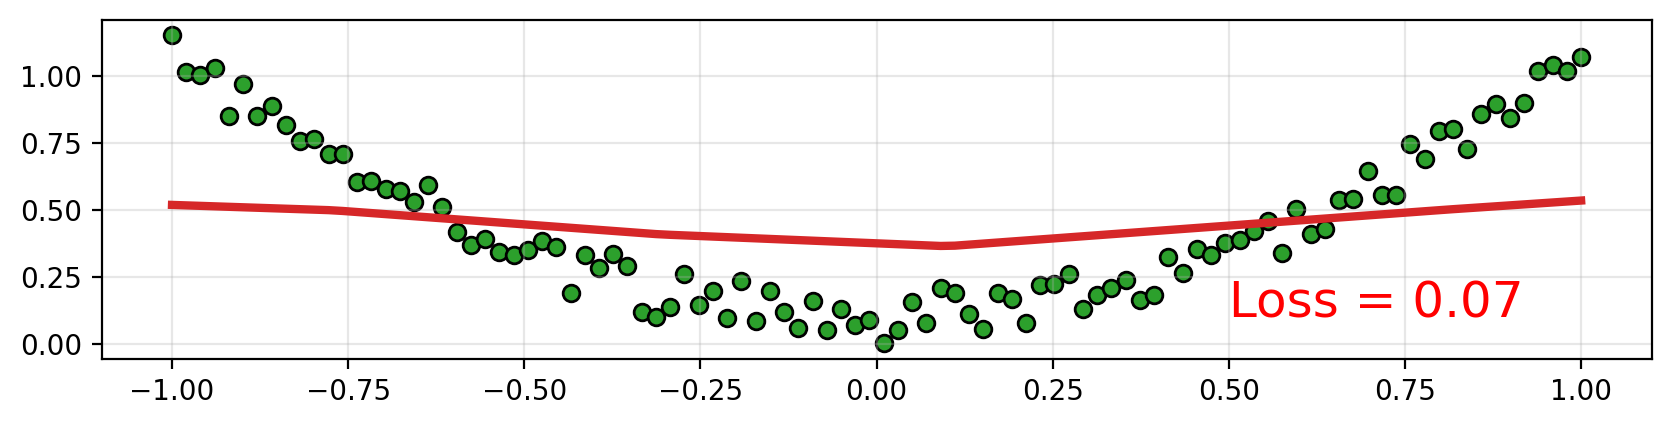

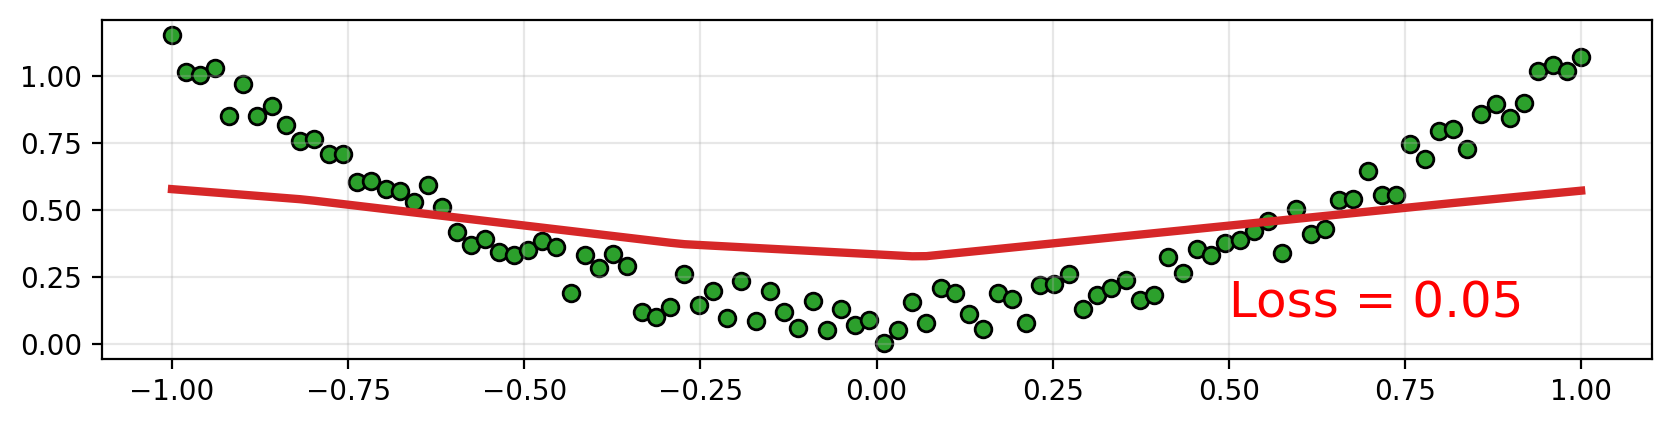

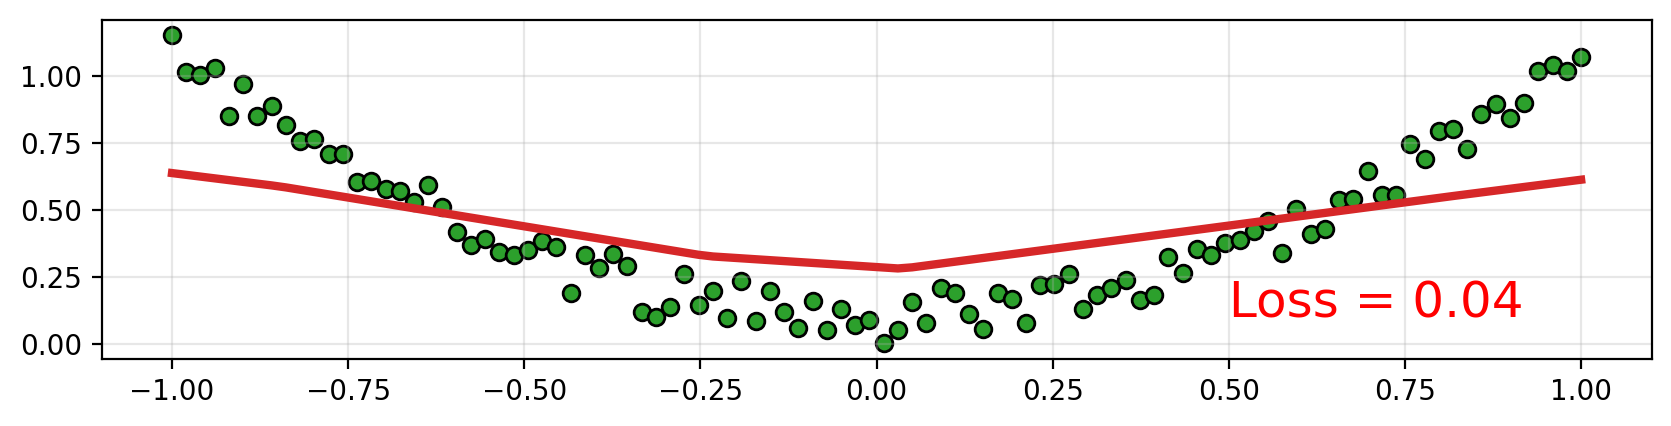

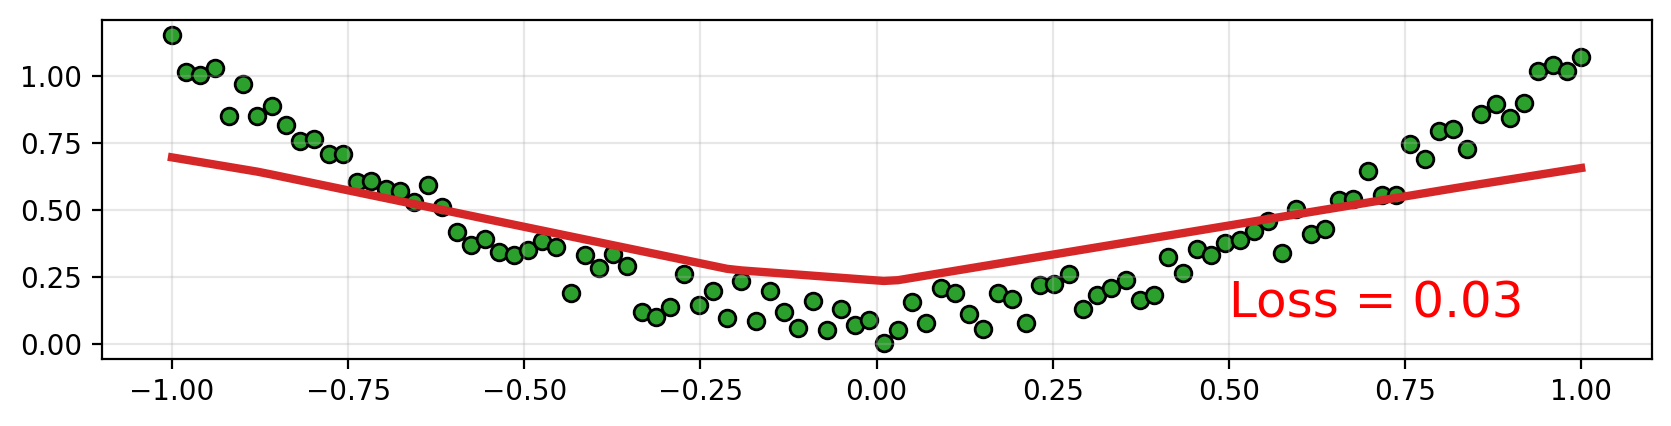

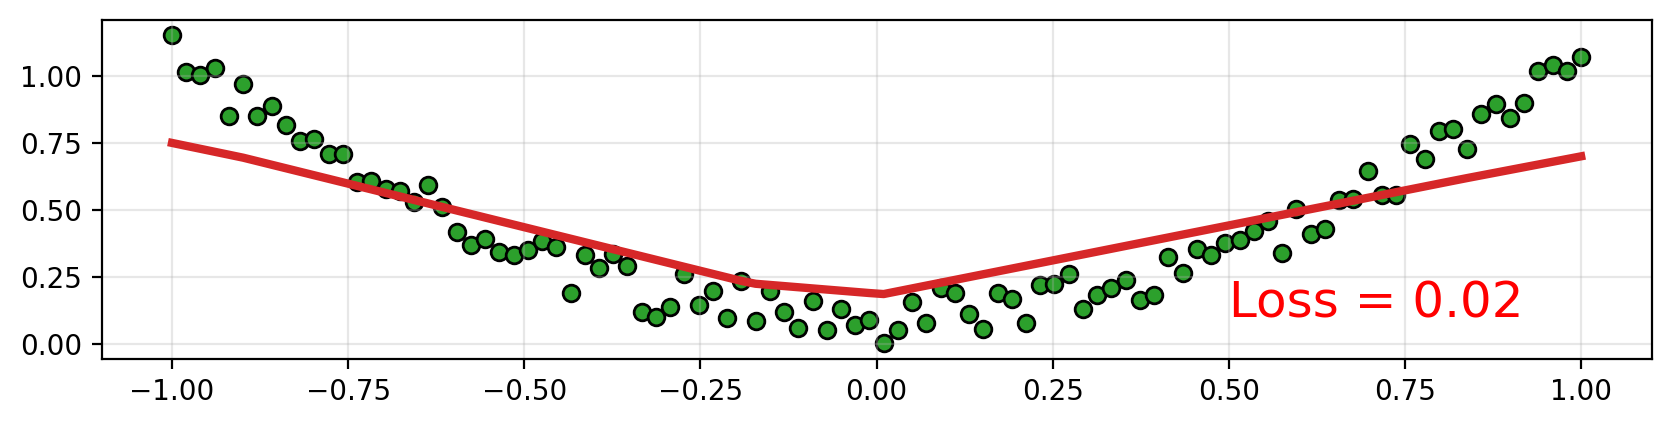

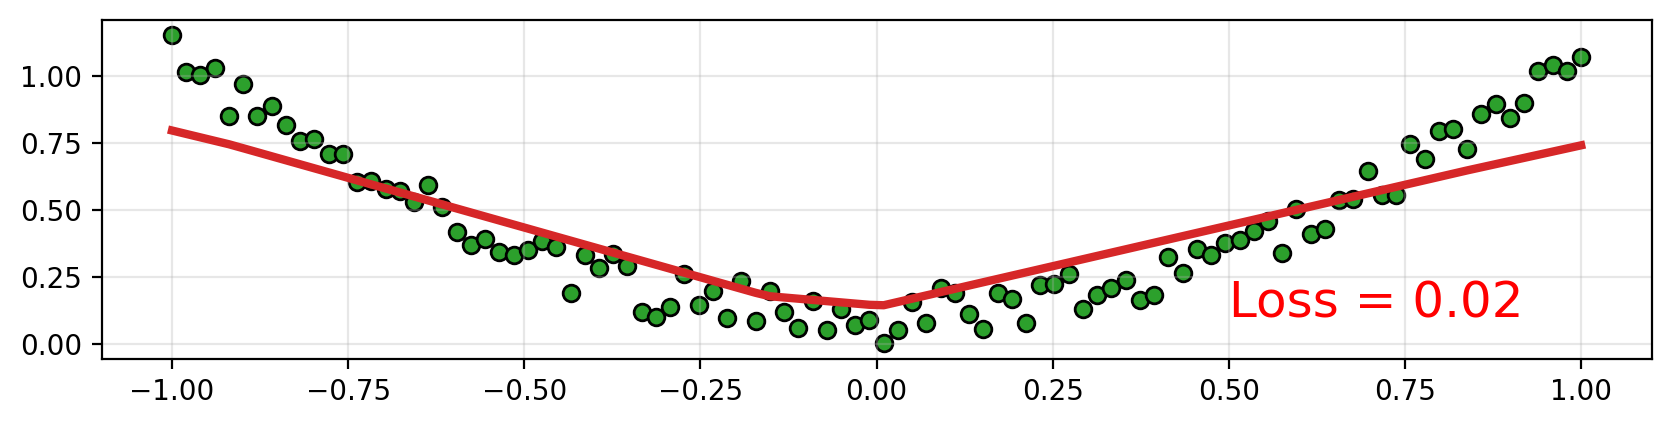

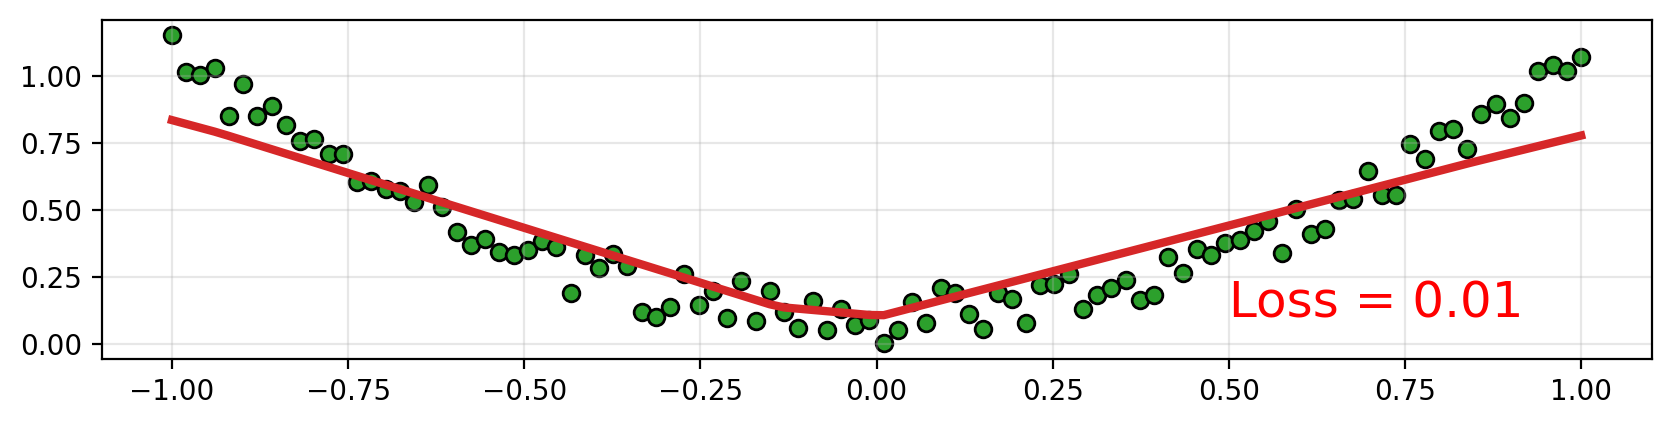

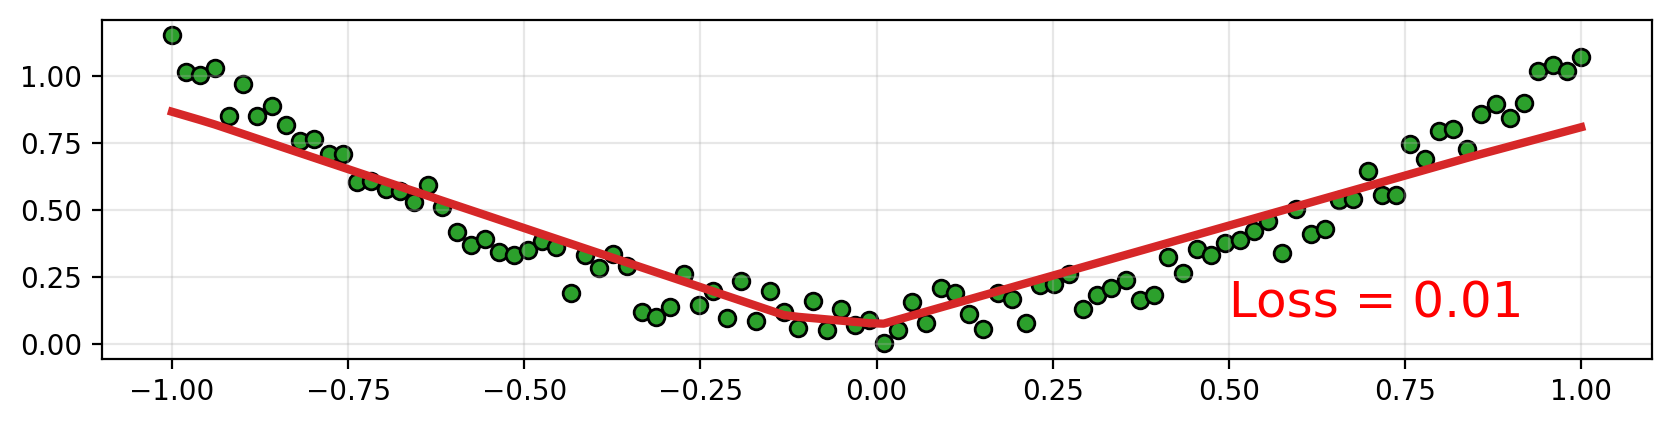

In [8]:
plt.ion() # figures will be shown automatically on creation, if 'interatctive' mode is 'on'.
for t in range(100): # 100 epochs
    prediction = net(x) # input x and predict based on x

    loss = loss_function(prediction, y) # must be (1. nn output, 2. target)

    optimizer.zero_grad() # clear gradient for next train
    loss.backward(retain_graph=True) # back-propagation, compute gradients
    optimizer.step() # apply gradients

    if t % 10 == 0:
        # plot and show learning process
        plt.figure(figsize=(10,2.2), dpi=200)
        plt.cla() # clear current axes

        plt.scatter(x.data.numpy(), y.data.numpy(),
                    color='#2ca02c',
                    marker='o',
                    linewidth=1,
                    edgecolor='black')
        plt.plot(x.data.numpy(), prediction.data.numpy(), '#d62728', linewidth=3)

        plt.text(0.5, 0.1, f"Loss = {loss.data.numpy():.2f}",
                 fontdict={'size' : 18, 'color' : 'red'})

        plt.grid(alpha=0.3)
        plt.show()
        plt.pause(0.1)

plt.ioff()

# 2. Classification task

# Generate fake data and visualize

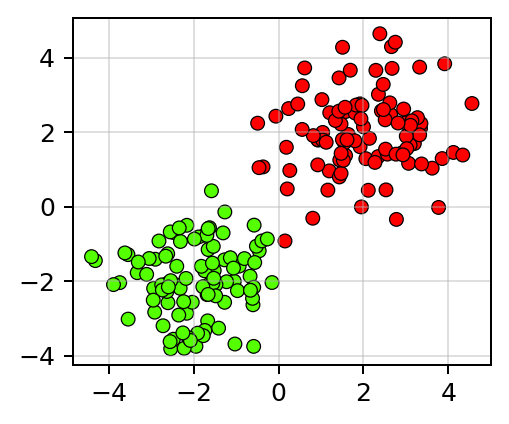

In [9]:
# Create a tensor of shape (100, 2) filled with ones
n_data = torch.ones(100, 2)

# Generate random numbers from a normal distribution having
# mean = 2*n_data, std = 1
x0 = torch.normal(2*n_data, 1) # class0 x data (tensor), shape=(100, 2)
y0 = torch.zeros(100)          # class0 y data (tensor), shape=(100)

x1 = torch.normal(-2*n_data, 1) # class1 x data (tensor), shape=(100, 2)
y1 = torch.ones(100)            # class1 y data (tensor), shape=(100)

# concatinating 2 tensors along 0 means 1st dimension that is rows
x = torch.cat((x0, x1), 0).type(torch.FloatTensor).requires_grad_(True) # shape=(200, 2), 32-bit Float Tensor
y = torch.cat((y0, y1), ).type(torch.LongTensor)   # shape=(200,), LongTensor = 64-bit integer

plt.figure(figsize=(3,2.5), dpi=180)
plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1],
            c=y.data.numpy(),
            s=30,               # size of the marker
            lw=0.5,             # line width of edge
            edgecolor='black',  # line color of edge
            cmap='prism')
plt.grid(alpha=0.4)
plt.show()

# Model Fitting

In [10]:
class ClassificationNet(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(ClassificationNet, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden) # hidden layer
        self.out = torch.nn.Linear(n_hidden, n_output) # output layer

    def forward(self, x):
        x = F.relu(self.hidden(x))
        x = self.out(x)
        return x

# Creating instance of network and defining optimizer and loss function

In [11]:
classification_net = ClassificationNet(n_feature=2, n_hidden=10, n_output=2)
print(classification_net)

# Softmax is internally computed
optimizer = torch.optim.SGD(classification_net.parameters(), lr=0.02)
loss_function = torch.nn.CrossEntropyLoss()

ClassificationNet(
  (hidden): Linear(in_features=2, out_features=10, bias=True)
  (out): Linear(in_features=10, out_features=2, bias=True)
)


# Plot the model

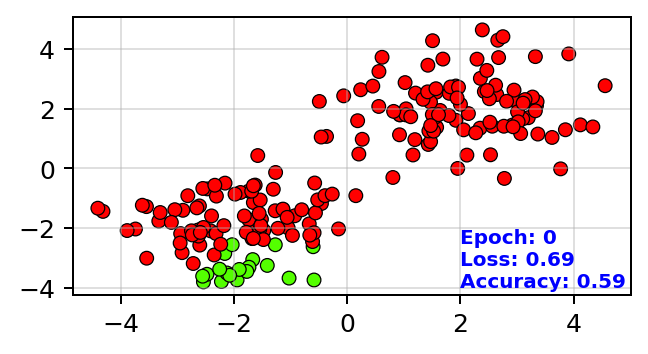

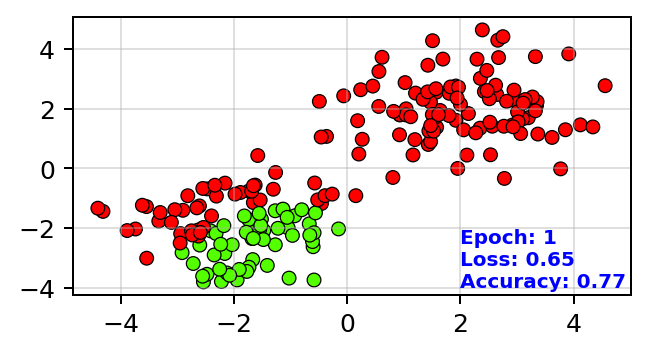

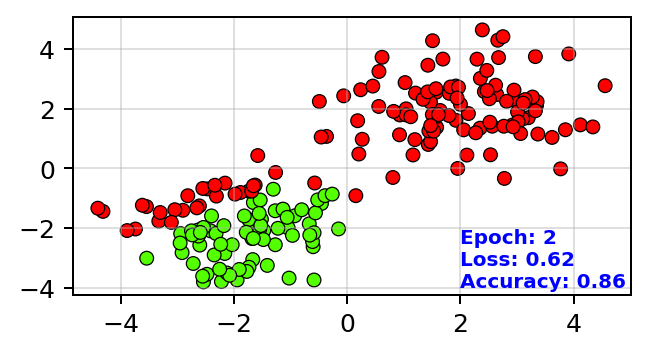

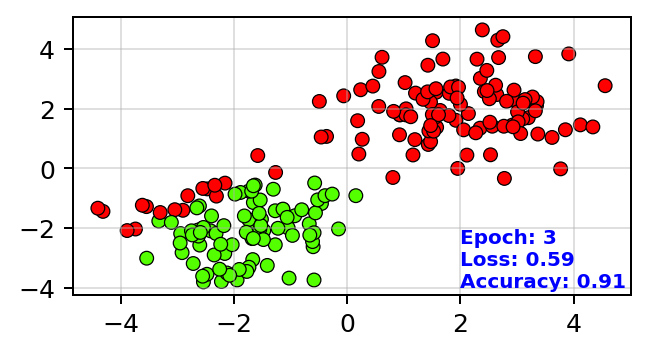

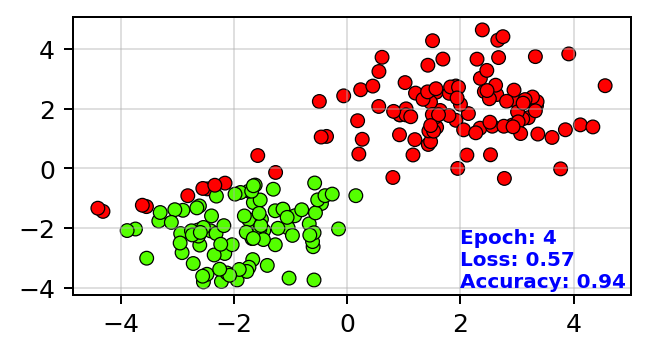

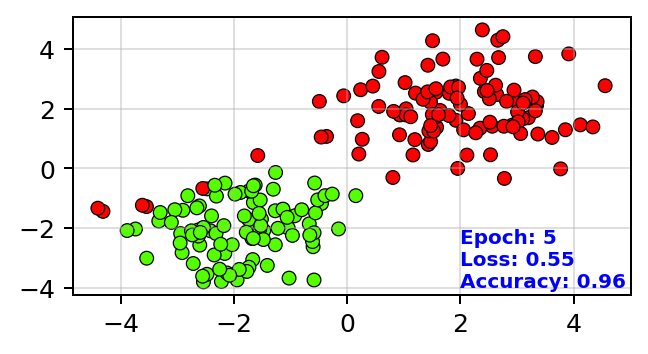

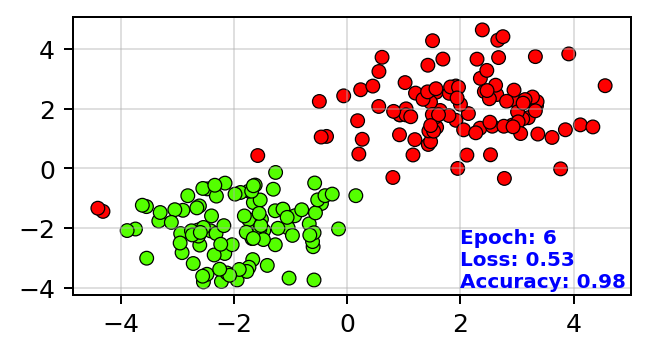

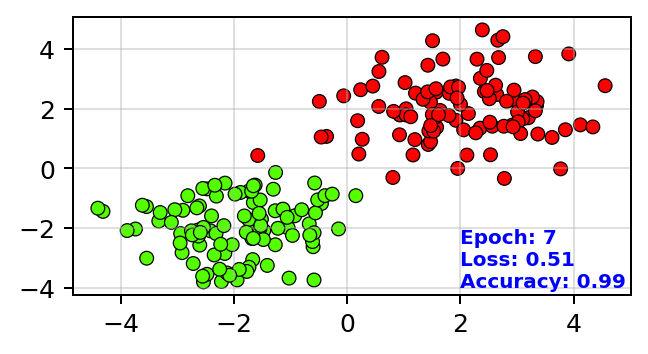

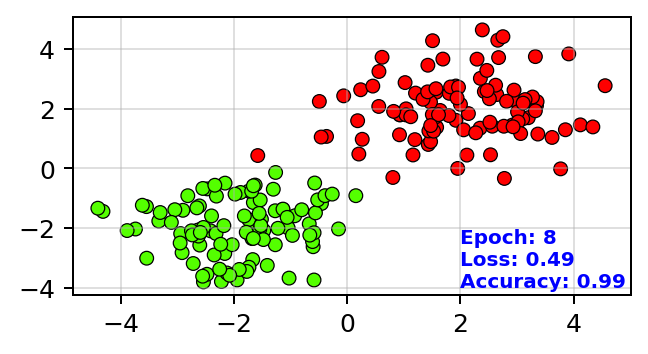

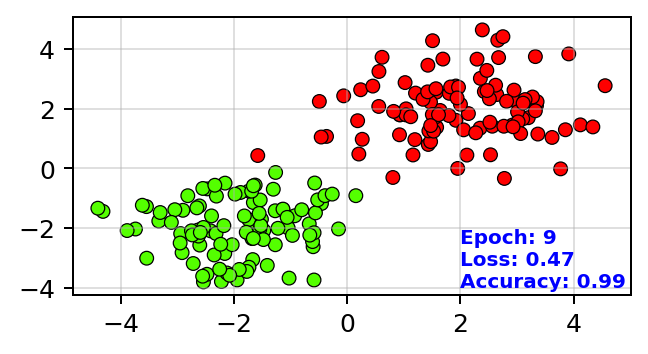

In [12]:
plt.ion()

losses = []
accuracies = []

for t in range(10): # 10 epochs
    out = classification_net(x) # input x and predict based on x
    loss = loss_function(out, y) # must be (1. nn output, 2. target)

    optimizer.zero_grad() # clear gradients for next train
    loss.backward() # perform back-propagation, compute gradients
    optimizer.step() # apply gradients

    _, predicted_value_indices = torch.max(F.softmax(out, dim=1), dim=1)
    pred_y = predicted_value_indices.numpy()
    target_y = y.data.numpy()

    accuracy = sum(pred_y == target_y) / 200.

    # plot and show learning process
    plt.figure(figsize=(4,2), dpi=180)

    plt.cla() # clear out previous plot (axes)

    plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1],
                c = pred_y,
                s=30,
                linewidth=0.5,
                edgecolor='black',
                cmap='prism')

    plt.text(2, -4,
             f"Epoch: {t} \nLoss: {loss:.2f} \nAccuracy: {accuracy:.2f}",
             fontdict={'size': 8, 'color': 'blue', 'weight': 600})

    losses.append(loss.item())
    accuracies.append(accuracy)

    plt.grid(alpha=0.4)
    plt.show()
    plt.pause(0.1)

plt.ioff()

# Let's plot Epoch vs. Accuracy & Epoch vs. Loss

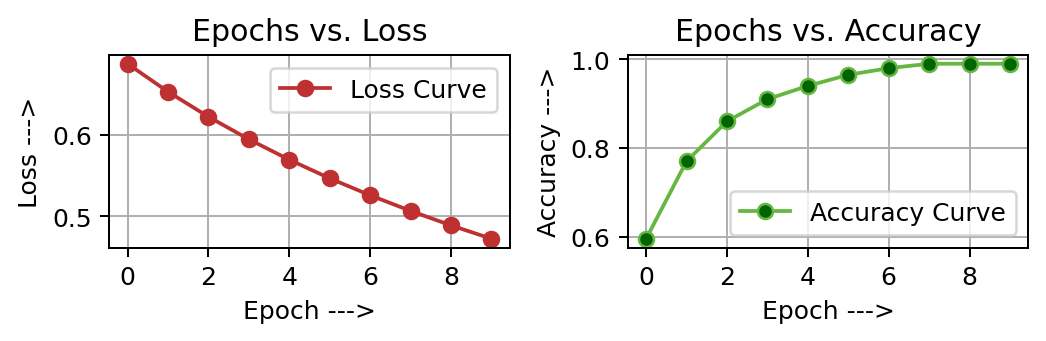

In [13]:
plt.figure(figsize=(6,2), dpi=180)

# plotting epoch vs. loss
plt.subplot(1, 2, 1)
plt.plot(range(len(losses)), losses, label='Loss Curve',
        color='#BF3131',
        marker='o')
plt.xlabel('Epoch --->')
plt.ylabel('Loss --->')
plt.title('Epochs vs. Loss')
plt.grid()
plt.legend()

# plotting epoch vs. accuracy
plt.subplot(122)
plt.plot(range(len(accuracies)), accuracies, label='Accuracy Curve',
        color='#65B741',
        marker='o',
        markerfacecolor='darkgreen')
plt.xlabel('Epoch --->')
plt.ylabel('Accuracy --->')
plt.title('Epochs vs. Accuracy')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show();

# Conclusion: Hence, we generated fake data seperately for Regression and Classification task and tried Fitting model over it, Trained on few epochs and checked for loss and accuracy.